<a href="https://colab.research.google.com/github/thiago-alves-saturnino/Analise-Exploratoria-Obitos-Rodovias-SP/blob/main/Projeto_Analise_de_dados_ObitosRodSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importar as bibliotecas necessárias:
import pandas as pd
!pip install -U pandas-profiling
from pandas_profiling import ProfileReport
import plotly
import plotly.offline as py
from plotly.offline import plot, iplot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



     |████████████████████████████████| 261 kB 5.1 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 303 kB 46.7 MB/s 
     |████████████████████████████████| 102 kB 9.5 MB/s 
     |████████████████████████████████| 3.1 MB 39.1 MB/s 
     |████████████████████████████████| 690 kB 52.1 MB/s 
     |████████████████████████████████| 10.9 MB 35.3 MB/s 
     |████████████████████████████████| 596 kB 68.9 MB/s 
     |████████████████████████████████| 812 kB 54.4 MB/s 
     |████████████████████████████████| 38.1 MB 336 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=211c78f137327cfc3ad38a5976f73ae19937688df06e92d3b32d12c661a19f85
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=2569d5a36c64872867e8019ef9cbd8390a5c7853aeb78376febe1a6804c57803
  

In [7]:
# carregando o data set
df= pd.read_csv('obitos_publico.csv', sep=';', encoding='latin1')

In [11]:
# visualizando as 5 primeiras linhas
df.head()

Id da Delegacia (RDO)  Número do Bo (RDO)  Ano do BO (RDO) Data do Óbito  \
0                  70923                 562             2022    2022-02-28   
1                  80504                1672             2022    2022-02-28   
2                  80504                1672             2022    2022-02-28   
3                 130516                1644             2022    2022-02-28   
4                 130516                1644             2022    2022-02-28   

  Data do Acidente Tipo de via  Dia do óbito  Mês do Óbito  \
0       2022-02-28    Rodovias            28             2   
1       2022-02-28    Rodovias            28             2   
2       2022-02-28    Rodovias            28             2   
3       2022-02-28    Rodovias            28             2   
4       2022-02-28    Rodovias            28             2   

  Mês Óbito Descrição  Ano do Óbito  ...  Tipo do veículo da vítima  \
0           FEVEREIRO          2022  ...                   CAMINHAO   
1           FEVEREIRO          2022  ...                MOTOCICLETA   
2           FEVEREIRO          2022  ...                MOTOCICLETA   
3           FEVEREIRO          2022  ...                MOTOCICLETA   
4           FEVEREIRO          2022  ...                MOTOCICLETA   

  Tipo de vítima Local do óbito Tipo de acidente  \
0       CONDUTOR            VIA           OUTROS   
1       CONDUTOR            VIA          COLISAO   
2     PASSAGEIRO            VIA          COLISAO   
3       CONDUTOR            VIA          COLISAO   
4     PASSAGEIRO            VIA          COLISAO   

                    Sub Tipo do Acidente       Sexo Faixa etária  \
0  TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS  MASCULINO        40-44   
1                                FRONTAL  MASCULINO        40-44   
2                                FRONTAL   FEMININO        40-44   
3                                FRONTAL  MASCULINO        55-59   
4                                FRONTAL   FEMININO        50-54   

  Idade da vítima Outro Veículo Envolvido Tempo entre o Acidente e o Óbito  
0              44                  NÃO HÁ                      Até 30 dias  
1              44               AUTOMOVEL                      Até 30 dias  
2              43               AUTOMOVEL                      Até 30 dias  
3              57               AUTOMOVEL                      Até 30 dias  
4              51               AUTOMOVEL                      Até 30 dias  

[5 rows x 34 columns]

In [31]:
# visualizando as 5 ultimas linhas
df.tail()

Id da Delegacia (RDO)  Número do Bo (RDO)  Ano do BO (RDO)  \
15896                  70934                 531             2019   
15897                  30403                 310             2019   
15898                  70929                 341             2019   
15899                  70924                 477             2019   
15900                 120508                  97             2019   

      Data do Óbito Data do Acidente      Tipo de via  Dia do óbito  \
15896    2019-01-14       2019-01-14         Rodovias            14   
15897    2019-01-14       2019-01-14         Rodovias            14   
15898    2019-01-14       2019-01-14         Rodovias            14   
15899    2019-01-14       2019-01-14  Vias Municipais            14   
15900    2019-01-14       2019-01-12  Vias Municipais            14   

       Mês do Óbito Mês Óbito Descrição  Ano do Óbito  ...  \
15896             1             JANEIRO          2019  ...   
15897             1             JANEIRO          2019  ...   
15898             1             JANEIRO          2019  ...   
15899             1             JANEIRO          2019  ...   
15900             1             JANEIRO          2019  ...   

       Tipo do veículo da vítima Tipo de vítima            Local do óbito  \
15896                MOTOCICLETA       CONDUTOR                       VIA   
15897                MOTOCICLETA       CONDUTOR                       VIA   
15898                MOTOCICLETA       CONDUTOR  ESTABELECIMENTO DE SAUDE   
15899                   PEDESTRE       PEDESTRE                       VIA   
15900                        NaN            NaN                       NaN   

      Tipo de acidente Sub Tipo do Acidente       Sexo Faixa etária  \
15896          COLISAO          TRANSVERSAL  MASCULINO        60-64   
15897           CHOQUE   MURO/PAREDE/TALUDE  MASCULINO        18-24   
15898          COLISAO             TRASEIRA  MASCULINO        18-24   
15899    ATROPELAMENTO           NA CALÇADA  MASCULINO        40-44   
15900              NaN                  NaN        NaN          NaN   

      Idade da vítima Outro Veículo Envolvido Tempo entre o Acidente e o Óbito  
15896              61                CAMINHAO                      Até 30 dias  
15897              18                  NÃO HÁ                      Até 30 dias  
15898              24                CAMINHAO                      Até 30 dias  
15899              40                  NÃO HÁ                      Até 30 dias  
15900             NaN                     NaN                              NaN  

[5 rows x 34 columns]

In [68]:
df= df.drop(df[df['Região Administrativa'] != 'Baixada Santista'].index)

In [69]:
df.head()

Id da Delegacia (RDO)  Número do Bo (RDO)  Ano do BO (RDO) Data do Óbito  \
61                   40231                 122             2022    2022-02-25   
62                   40929                 812             2022    2022-02-25   
106                  40212                 177             2022    2022-02-21   
119                  42428                 308             2022    2022-02-20   
120                  42428                 308             2022    2022-02-20   

    Data do Acidente      Tipo de via  Dia do óbito  Mês do Óbito  \
61        2022-02-25         Rodovias            25             2   
62        2022-02-25         Rodovias            25             2   
106       2022-02-21  Vias Municipais            21             2   
119       2022-02-20         Rodovias            20             2   
120       2022-02-20         Rodovias            20             2   

    Mês Óbito Descrição  Ano do Óbito  ...  Tipo do veículo da vítima  \
61            FEVEREIRO          2022  ...                   CAMINHAO   
62            FEVEREIRO          2022  ...                   PEDESTRE   
106           FEVEREIRO          2022  ...                MOTOCICLETA   
119           FEVEREIRO          2022  ...                MOTOCICLETA   
120           FEVEREIRO          2022  ...                   PEDESTRE   

    Tipo de vítima            Local do óbito Tipo de acidente  \
61        CONDUTOR  ESTABELECIMENTO DE SAUDE          COLISAO   
62        PEDESTRE                       VIA    ATROPELAMENTO   
106       CONDUTOR  ESTABELECIMENTO DE SAUDE           CHOQUE   
119       CONDUTOR  ESTABELECIMENTO DE SAUDE    ATROPELAMENTO   
120       PEDESTRE  ESTABELECIMENTO DE SAUDE    ATROPELAMENTO   

    Sub Tipo do Acidente       Sexo Faixa etária Idade da vítima  \
61              TRASEIRA  MASCULINO        50-54              53   
62        CRUZANDO A VIA  MASCULINO        65-69              68   
106               ÁRVORE  MASCULINO        30-34              33   
119       NAO DISPONIVEL  MASCULINO        35-39              38   
120       CRUZANDO A VIA  MASCULINO        18-24              20   

    Outro Veículo Envolvido Tempo entre o Acidente e o Óbito  
61                 CAMINHAO                      Até 30 dias  
62              MOTOCICLETA                      Até 30 dias  
106          NAO DISPONIVEL                      Até 30 dias  
119             MOTOCICLETA                      Até 30 dias  
120             MOTOCICLETA                      Até 30 dias  

[5 rows x 34 columns]

In [70]:
# analisando os tipos de variáveis em cada uma das colunas.
## descobertas: o data set tem 34 colunas e 39651 linhas. possui variaves tipo OBJ, INT e FLoat. 
##Observa-se que ha 2 colunas com valores nulos/sem dados (usar isnull para verificar). 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 61 to 15846
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id da Delegacia (RDO)             758 non-null    int64  
 1   Número do Bo (RDO)                758 non-null    int64  
 2   Ano do BO (RDO)                   758 non-null    int64  
 3   Data do Óbito                     758 non-null    object 
 4   Data do Acidente                  758 non-null    object 
 5   Tipo de via                       758 non-null    object 
 6   Dia do óbito                      758 non-null    int64  
 7   Mês do Óbito                      758 non-null    int64  
 8   Mês Óbito Descrição               758 non-null    object 
 9   Ano do Óbito                      758 non-null    int64  
 10  Ano/Mês do Óbito                  758 non-null    float64
 11  Dia da Semana                     758 non-null    object 
 12  Hora 

In [71]:
# identificando colunas com valores em branco/ sem valores
df.isnull().sum()

Id da Delegacia (RDO)               0
Número do Bo (RDO)                  0
Ano do BO (RDO)                     0
Data do Óbito                       0
Data do Acidente                    0
Tipo de via                         0
Dia do óbito                        0
Mês do Óbito                        0
Mês Óbito Descrição                 0
Ano do Óbito                        0
Ano/Mês do Óbito                    0
Dia da Semana                       0
Hora do Acidente                    0
Turno                               0
Município                           0
Região Administrativa               0
Logradouro                          0
Númeral / KM                        0
Jurisdição                          0
Administração                       0
Conservação                         0
Tipo do local da ocorrência         0
LAT_(GEO)                           0
LONG_(GEO)                          0
Tipo do veículo da vítima           0
Tipo de vítima                      0
Local do óbi

In [72]:
# identificando os tipos das variaveis de cada coluna
df.dtypes

Id da Delegacia (RDO)                 int64
Número do Bo (RDO)                    int64
Ano do BO (RDO)                       int64
Data do Óbito                        object
Data do Acidente                     object
Tipo de via                          object
Dia do óbito                          int64
Mês do Óbito                          int64
Mês Óbito Descrição                  object
Ano do Óbito                          int64
Ano/Mês do Óbito                    float64
Dia da Semana                        object
Hora do Acidente                     object
Turno                                object
Município                            object
Região Administrativa                object
Logradouro                           object
Númeral / KM                         object
Jurisdição                           object
Administração                        object
Conservação                          object
Tipo do local da ocorrência          object
LAT_(GEO)                       

In [73]:
# visualizando numero de linhas e colunas (metodo 2)
df.shape

(758, 34)

In [74]:
# contagem dos dados por coluna
df.count()

Id da Delegacia (RDO)               758
Número do Bo (RDO)                  758
Ano do BO (RDO)                     758
Data do Óbito                       758
Data do Acidente                    758
Tipo de via                         758
Dia do óbito                        758
Mês do Óbito                        758
Mês Óbito Descrição                 758
Ano do Óbito                        758
Ano/Mês do Óbito                    758
Dia da Semana                       758
Hora do Acidente                    758
Turno                               758
Município                           758
Região Administrativa               758
Logradouro                          758
Númeral / KM                        758
Jurisdição                          758
Administração                       758
Conservação                         758
Tipo do local da ocorrência         758
LAT_(GEO)                           758
LONG_(GEO)                          758
Tipo do veículo da vítima           758


In [75]:
# estatistica destritiva dos dados
df.describe()

Id da Delegacia (RDO)  Número do Bo (RDO)  Ano do BO (RDO)  \
count             758.000000          758.000000       758.000000   
mean            41635.558047         3297.098945      2020.059367   
std             34895.705444        32684.684408         0.912506   
min             20210.000000            1.000000      2018.000000   
25%             40203.000000          673.250000      2019.000000   
50%             40209.000000         1485.000000      2020.000000   
75%             40225.000000         2761.000000      2021.000000   
max            999997.000000       900213.000000      2022.000000   

       Dia do óbito  Mês do Óbito  Ano do Óbito  Ano/Mês do Óbito  
count    758.000000    758.000000    758.000000        758.000000  
mean      15.373351      6.536939   2020.060686       2020.126055  
std        8.746944      3.634283      0.908792          0.904615  
min        1.000000      1.000000   2019.000000       2019.010000  
25%        7.250000      3.000000   2019.000000       2019.100000  
50%       15.000000      7.000000   2020.000000       2020.070000  
75%       23.000000     10.000000   2021.000000       2021.050000  
max       31.000000     12.000000   2022.000000       2022.020000

In [76]:
# usando o pandas profile pode-se gerar um relatorio estatistico/descritivo completo do conjunto de dados. 
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
df.head()

Id da Delegacia (RDO)  Número do Bo (RDO)  Ano do BO (RDO) Data do Óbito  \
61                   40231                 122             2022    2022-02-25   
62                   40929                 812             2022    2022-02-25   
106                  40212                 177             2022    2022-02-21   
119                  42428                 308             2022    2022-02-20   
120                  42428                 308             2022    2022-02-20   

    Data do Acidente      Tipo de via  Dia do óbito  Mês do Óbito  \
61        2022-02-25         Rodovias            25             2   
62        2022-02-25         Rodovias            25             2   
106       2022-02-21  Vias Municipais            21             2   
119       2022-02-20         Rodovias            20             2   
120       2022-02-20         Rodovias            20             2   

    Mês Óbito Descrição  Ano do Óbito  ...  Tipo do veículo da vítima  \
61            FEVEREIRO          2022  ...                   CAMINHAO   
62            FEVEREIRO          2022  ...                   PEDESTRE   
106           FEVEREIRO          2022  ...                MOTOCICLETA   
119           FEVEREIRO          2022  ...                MOTOCICLETA   
120           FEVEREIRO          2022  ...                   PEDESTRE   

    Tipo de vítima            Local do óbito Tipo de acidente  \
61        CONDUTOR  ESTABELECIMENTO DE SAUDE          COLISAO   
62        PEDESTRE                       VIA    ATROPELAMENTO   
106       CONDUTOR  ESTABELECIMENTO DE SAUDE           CHOQUE   
119       CONDUTOR  ESTABELECIMENTO DE SAUDE    ATROPELAMENTO   
120       PEDESTRE  ESTABELECIMENTO DE SAUDE    ATROPELAMENTO   

    Sub Tipo do Acidente       Sexo Faixa etária Idade da vítima  \
61              TRASEIRA  MASCULINO        50-54              53   
62        CRUZANDO A VIA  MASCULINO        65-69              68   
106               ÁRVORE  MASCULINO        30-34              33   
119       NAO DISPONIVEL  MASCULINO        35-39              38   
120       CRUZANDO A VIA  MASCULINO        18-24              20   

    Outro Veículo Envolvido Tempo entre o Acidente e o Óbito  
61                 CAMINHAO                      Até 30 dias  
62              MOTOCICLETA                      Até 30 dias  
106          NAO DISPONIVEL                      Até 30 dias  
119             MOTOCICLETA                      Até 30 dias  
120             MOTOCICLETA                      Até 30 dias  

[5 rows x 34 columns]

**Analise exploratoria**

In [78]:
# Separando obitos por ano
df['Ano do Óbito'].value_counts()

2019    254
2020    241
2021    226
2022     37
Name: Ano do Óbito, dtype: int64

In [79]:
# Renomeação de alguns títulos do database para facilitar seu uso:
columns = {'Data do Óbito': 'data_do_obito','Ano do Óbito':'ano_obito','Dia da Semana':'dia_semana',
           'LAT_(GEO)':'lat','LONG_(GEO)':'long',
           'Tipo do veículo da vítima': 'tipo_veiculo','Tipo de vítima':'tipo_vitima','Local do óbito':'local_obito',
           'Tipo de acidente':'tipo_acidente','Sub Tipo do Acidente':'sub_tipo_acidente'}
df = df.rename(columns, axis=1)

In [97]:
# Títulos renomeados com 'underline'.
df.head()

Id da Delegacia (RDO)  Número do Bo (RDO)  Ano do BO (RDO) data_do_obito  \
61                   40231                 122             2022    2022-02-25   
62                   40929                 812             2022    2022-02-25   
106                  40212                 177             2022    2022-02-21   
119                  42428                 308             2022    2022-02-20   
120                  42428                 308             2022    2022-02-20   

    Data do Acidente      Tipo de via  Dia do óbito  Mês do Óbito  \
61        2022-02-25         Rodovias            25             2   
62        2022-02-25         Rodovias            25             2   
106       2022-02-21  Vias Municipais            21             2   
119       2022-02-20         Rodovias            20             2   
120       2022-02-20         Rodovias            20             2   

    Mês Óbito Descrição  ano_obito  ...  tipo_veiculo tipo_vitima  \
61            FEVEREIRO       2022  ...      CAMINHAO    CONDUTOR   
62            FEVEREIRO       2022  ...      PEDESTRE    PEDESTRE   
106           FEVEREIRO       2022  ...   MOTOCICLETA    CONDUTOR   
119           FEVEREIRO       2022  ...   MOTOCICLETA    CONDUTOR   
120           FEVEREIRO       2022  ...      PEDESTRE    PEDESTRE   

                  local_obito  tipo_acidente sub_tipo_acidente       Sexo  \
61   ESTABELECIMENTO DE SAUDE        COLISAO          TRASEIRA  MASCULINO   
62                        VIA  ATROPELAMENTO    CRUZANDO A VIA  MASCULINO   
106  ESTABELECIMENTO DE SAUDE         CHOQUE            ÁRVORE  MASCULINO   
119  ESTABELECIMENTO DE SAUDE  ATROPELAMENTO    NAO DISPONIVEL  MASCULINO   
120  ESTABELECIMENTO DE SAUDE  ATROPELAMENTO    CRUZANDO A VIA  MASCULINO   

    Faixa etária Idade da vítima Outro Veículo Envolvido  \
61         50-54              53                CAMINHAO   
62         65-69              68             MOTOCICLETA   
106        30-34              33          NAO DISPONIVEL   
119        35-39              38             MOTOCICLETA   
120        18-24              20             MOTOCICLETA   

    Tempo entre o Acidente e o Óbito  
61                       Até 30 dias  
62                       Até 30 dias  
106                      Até 30 dias  
119                      Até 30 dias  
120                      Até 30 dias  

[5 rows x 34 columns]

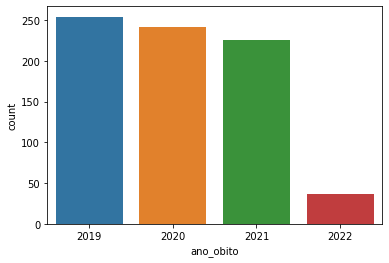

In [81]:
# Grafico obitos por ano (metodo 1)
graf01 = sns.countplot(x='ano_obito', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

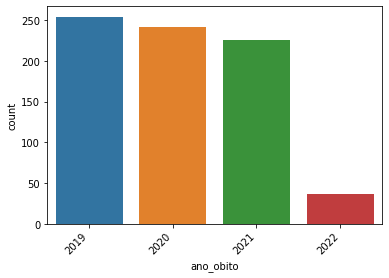

In [82]:
# Grafico obitos por ano (metodo 2)
sns.countplot(df.ano_obito)
plt.xticks(rotation=45, horizontalalignment="right")



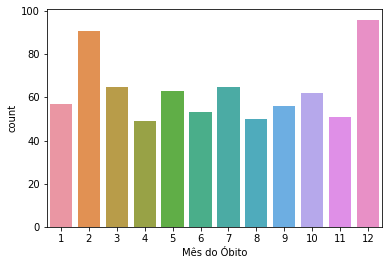

In [83]:
# Grafico obitos por mes
graf01 = sns.countplot(x='Mês do Óbito', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

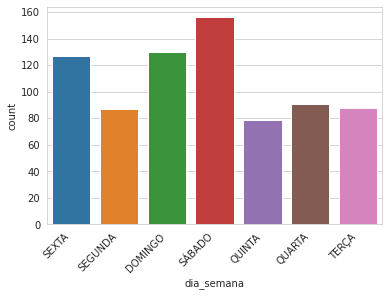

In [138]:
# Grafico obitos por ano (metodo 2)
sns.countplot(df.dia_semana)
plt.xticks(rotation=45, horizontalalignment="right")

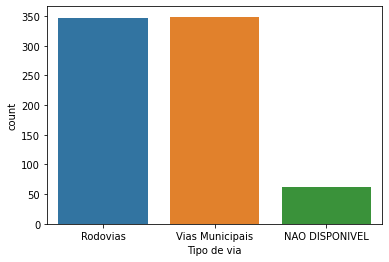

In [84]:
# Grafico obitos por tipo de via
graf01 = sns.countplot(x='Tipo de via', data=df)
plt.show()

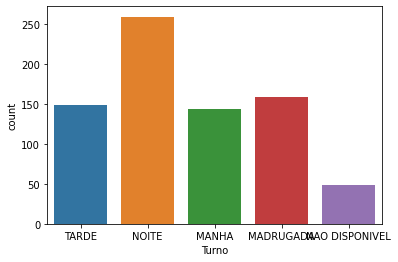

In [85]:
# Grafico obitos por turno
graf01 = sns.countplot(x='Turno', data=df)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

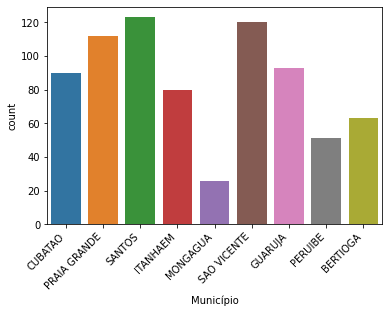

In [87]:
# Grafico obitos por Municipio
graf01 = sns.countplot(x='Município', data=df)
plt.xticks(rotation=45, horizontalalignment="right")


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

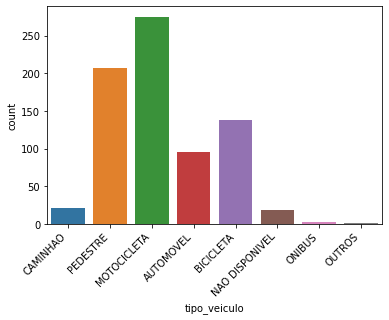

In [88]:
# Grafico obitos por Tipo de Veiculo
graf01 = sns.countplot(x='tipo_veiculo', data=df)
plt.xticks(rotation=45, horizontalalignment="right")

<function matplotlib.pyplot.show>

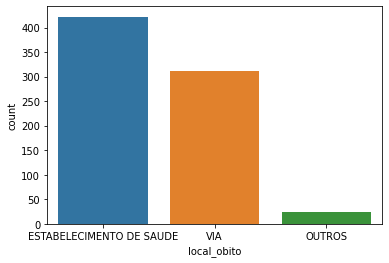

In [90]:
# Grafico Local do Obito (Acidente fatal)
graf01 = sns.countplot(x='local_obito', data=df)
plt.show

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

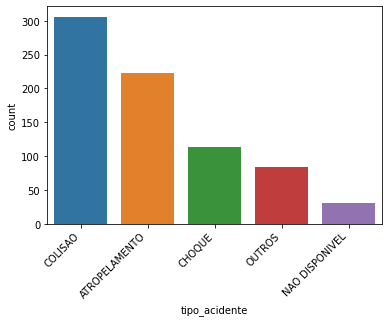

In [92]:
# Grafico Tipos de acidente
graf01 = sns.countplot(x='tipo_acidente', data=df)
plt.xticks(rotation=45, horizontalalignment="right")

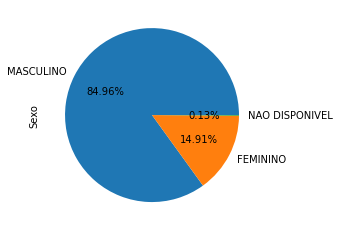

In [100]:
# Com Pandas
df.Sexo.value_counts().plot(kind='pie', autopct='%.2f%%')


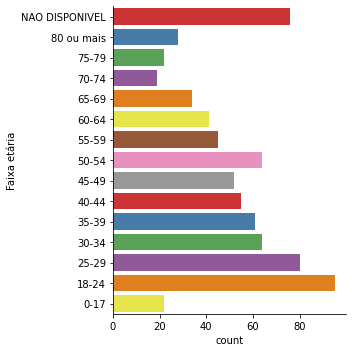

In [117]:
sns.catplot(y="Faixa etária", kind="count", palette="Set1", data=df.sort_values("Faixa etária", ascending=False))


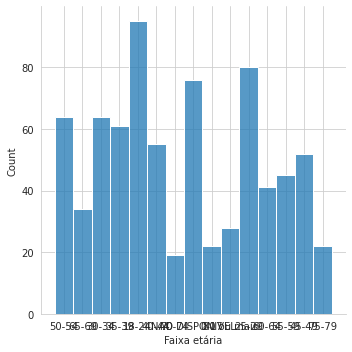

In [132]:
sns.displot(df['Faixa etária'])